# Introduction to Python  

### Geographical and Spatial Analysis

Installing packages and extensions

In [1]:
## Installing Node.js

#!sudo npm cache clean -f
#!sudo npm install -g n
#!sudo n latest
#!sudo apt install --reinstall nodejs libnode64

In [2]:
## Installing jupyterlab extensions

# jupyter labextension install jupyterlab-plotly
# !jupyter nbextension enable --py widgetsnbextension --sys-prefix
# !jupyter nbextension enable --py plotlywidget --sys-prefix

In [3]:
# !pip install plotly plotly-geo geopandas shapely pyshp html5lib nominatim geopy pydotplus python-twitter ipywidgets descartes chart_studio

## or

#import pip
#pip.main(['install','nominatim'])
#pip.main(['install','geopy'])
#pip.main(['install','pydotplus'])
#pip.main(['install','python-twitter'])
#pip.main(['install','python-levenshtein'])

Importing packages

In [4]:
import re
import sys
import os
import json
import time
import codecs
from datetime import datetime
from datetime import timedelta
from itertools import chain
from itertools import cycle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import Levenshtein
import networkx as nx
import twitter
import nltk

import requests
import urllib
from urllib.request import urlopen
import webbrowser
from bs4 import BeautifulSoup

import pydotplus #Install http://www.graphviz.org/ & Instal https://pypi.python.org/pypi/pydotplus

from IPython.display import Image, HTML, IFrame, FileLink, FileLinks #needed to render in notebook
from IPython.core.display import display
import ipywidgets as widgets

%matplotlib inline

Set default figure size for this notebook

In [5]:
plt.rcParams['figure.figsize'] = (16.0, 12.8)
#plt.switch_backend('Agg')

## Using Geopy geolocators

[Geopy](https://pypi.python.org/pypi/geopy)  
[Geopy Geocoders](https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders)

In [6]:
import geopy.geocoders as gg

geolocator = gg.Nominatim(user_agent="test_application") #https://operations.osmfoundation.org/policies/nominatim/

#### To geolocate a query to an address and coordinates:

In [7]:
address = "Universitätsring 1, 1010 Wien"
location = geolocator.geocode(address)
print(location.address)

Universität Wien, 1, Universitätsring, Schottenviertel, Innere Stadt, Wien, 1010, Österreich


In [8]:
address = "wiener stadtpark"
location = geolocator.geocode(address)
print(location.address)

Stadtpark, Wiener Neustadt, Niederösterreich, 2700, Österreich


In [9]:
print((location.latitude, location.longitude))

(47.809272199999995, 16.238286097338488)


In [10]:
print(json.dumps(location.raw, indent=4, sort_keys=True))

{
    "boundingbox": [
        "47.8078459",
        "47.810662",
        "16.2351488",
        "16.2434243"
    ],
    "class": "leisure",
    "display_name": "Stadtpark, Wiener Neustadt, Nieder\u00f6sterreich, 2700, \u00d6sterreich",
    "importance": 0.35000000000000003,
    "lat": "47.809272199999995",
    "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
    "lon": "16.238286097338488",
    "osm_id": 30512595,
    "osm_type": "way",
    "place_id": 98907370,
    "type": "park"
}


#### To find an address with coordinates:

In [11]:
addresses = geolocator.reverse((48.2,16.3))
for address in addresses:
    print(address)

23, Gottfried-Alber-Gasse, KG Breitensee, Penzing, Wien, 1140, Österreich
(48.200611550000005, 16.299628930858802)


#### More precise coordinates

In [12]:
coordinates = (48.213237, 16.360047)
location = geolocator.reverse(coordinates)
print(location.address)

Arkadenhof, Reichsratsstraße, Alservorstadt, KG Alsergrund, Innere Stadt, Wien, Österreich


In [13]:
print((location.latitude, location.longitude))

(48.21307295, 16.36002102413772)


In [14]:
print(json.dumps(location.raw, indent=4, sort_keys=True))

{
    "address": {
        "city": "Wien",
        "city_district": "Innere Stadt",
        "country": "\u00d6sterreich",
        "country_code": "at",
        "man_made": "Arkadenhof",
        "road": "Reichsratsstra\u00dfe",
        "suburb": "Alservorstadt"
    },
    "boundingbox": [
        "48.2128577",
        "48.2133902",
        "16.3595503",
        "16.3605998"
    ],
    "display_name": "Arkadenhof, Reichsratsstra\u00dfe, Alservorstadt, KG Alsergrund, Innere Stadt, Wien, \u00d6sterreich",
    "lat": "48.21307295",
    "licence": "Data \u00a9 OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",
    "lon": "16.36002102413772",
    "osm_id": 23908556,
    "osm_type": "way",
    "place_id": 93674662
}


### Showing coordinates on embedded map using display

[Google maps](https://developers.google.com/maps/documentation/staticmaps/)  
[Google maps parameters](http://stackoverflow.com/questions/2660201/what-parameters-should-i-use-in-a-google-maps-url-to-go-to-a-lat-lon/9919251#9919251)

#m – normal map  
k – satellite  
h – hybrid  
p – terrain

In [15]:
from IPython.core.display import display

In [16]:
def gmap(address,lat,lon,zoom=15,tmap='m'):
    # Google Maps URL template for an iframe
    base_url = 'http://maps.google.com/maps'
    gmap_url = base_url + f'?q={address}&loc:{lat}+{lon}&z={zoom}&t={tmap}&output=embed'
    display(IFrame(gmap_url, '800px', '600px'))
    
gmap(address, location.latitude, location.longitude, 17, 'k')

## Using [Geopandas](https://geopandas.org/index.html)

GeoPandas, as the name suggests, extends popular data science library pandas by adding support for geospatial data.    

The core data structure in GeoPandas is geopandas.GeoDataFrame, a subclass of pandas.DataFrame able to store geometry columns and perform spatial operations. Geometries are handled by geopandas.GeoSeries, a subclass of pandas.Series. Therefore, your GeoDataFrame is a combination of Series with your data (numerical, boolean, text etc.) and GeoSeries with geometries (points, polygons etc.).  

![](https://geopandas.org/_images/dataframe.svg)

In [17]:
import geopandas as gpd
from geopandas.tools import geocode
from shapely.geometry import LineString, MultiPolygon

In [18]:
gdf = gpd.read_file(gpd.datasets.get_path("nybb"))

gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


#### Measuring area

In [19]:
gdf = gdf.set_index("BoroName")

In [20]:
gdf["area"] = gdf.area
gdf["area"]

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

#### Getting polygon boundary and centroid

In [21]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

In [22]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

BoroName
Staten Island     POINT (941639.450 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx            POINT (1021174.790 249937.980)
Name: centroid, dtype: geometry

#### Measuring distance

In [23]:
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: distance, dtype: float64

#### Making maps

<AxesSubplot:>

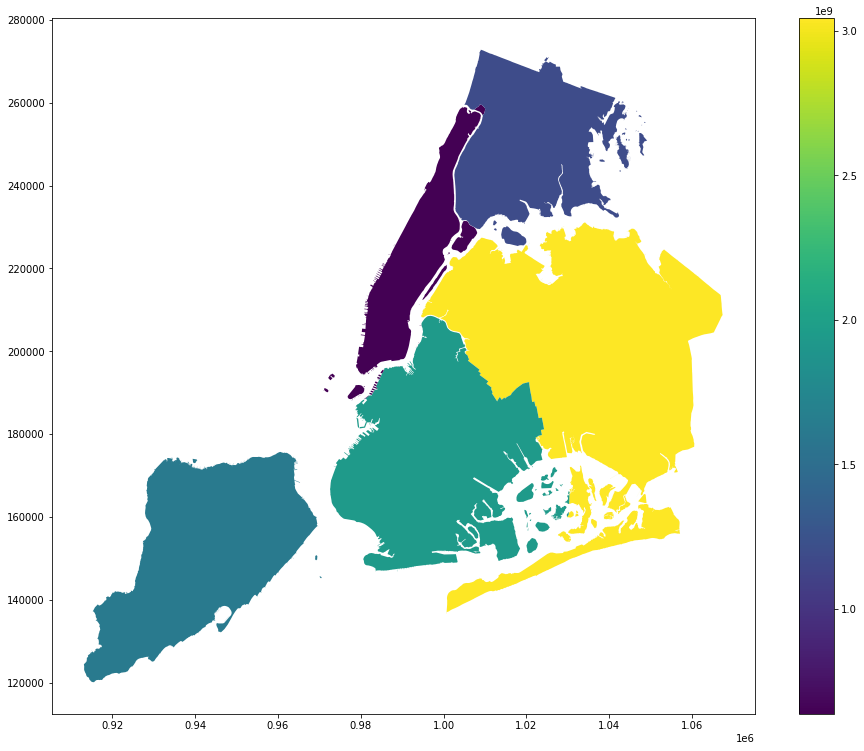

In [24]:
gdf.plot("area", legend=True)

<AxesSubplot:>

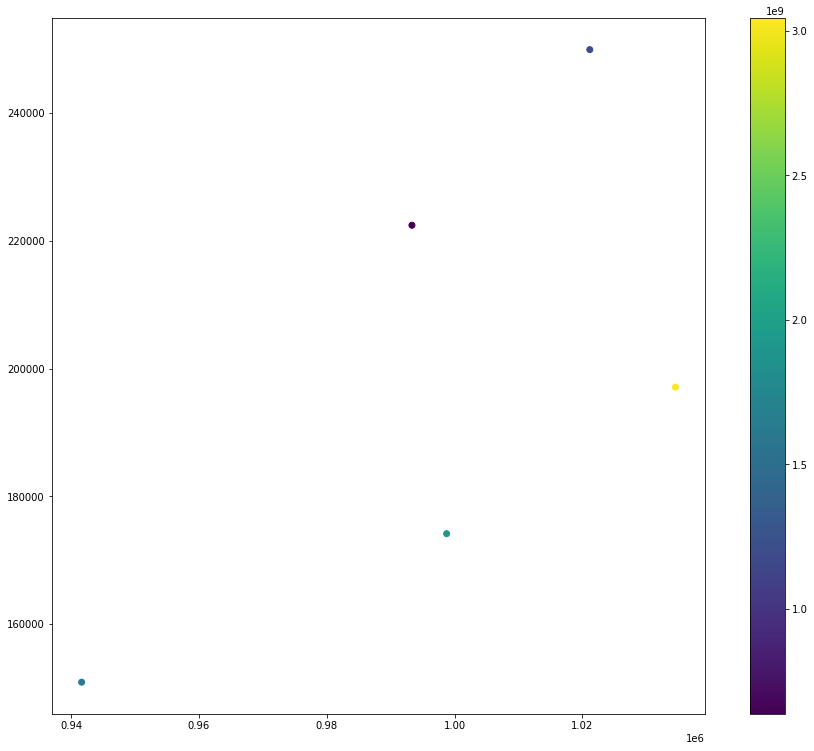

In [25]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True)

<AxesSubplot:>

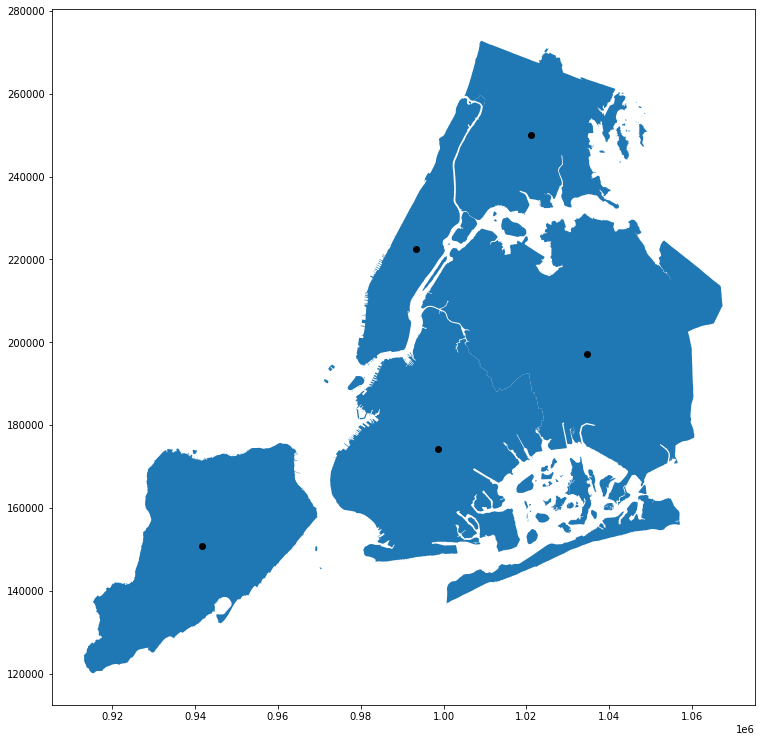

In [26]:
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")

### Downloading and using different GeoJson files

https://data.statistik.gv.at/web/catalog.jsp  
https://github.com/ginseng666/GeoJSON-TopoJSON-Austria

In [28]:
gdf2 = gpd.read_file('../Data/Geo/KDZ_Stadtregionen_GEM_20160101.geojson')
gdf2

,gkz,name,sr_zone,sr_name,is_core,sr_region,geometry
0,10101,Eisenstadt,SR341,Kernzone Eisenstadt,1,SR340,"MULTIPOLYGON (((636886.650 445997.090, 636910...."
1,10301,Breitenbrunn am Neusiedler See,SR012,Aussenzone Wien,0,SR010,"MULTIPOLYGON (((651357.030 458158.250, 651357...."
2,10303,Großhöflein,SR341,Kernzone Eisenstadt,1,SR340,"MULTIPOLYGON (((635646.620 445609.140, 635646...."
3,10305,Klingenbach,SR342,Aussenzone Eisenstadt,0,SR340,"MULTIPOLYGON (((644141.140 433837.300, 644140...."
4,10308,Müllendorf,SR341,Kernzone Eisenstadt,1,SR340,"MULTIPOLYGON (((635196.980 445521.970, 635203...."
...,...,...,...,...,...,...,...
758,80421,Übersaxen,SR082,Aussenzone Feldkirch,0,SR080,"MULTIPOLYGON (((123159.810 380528.300, 123185...."
759,80422,Viktorsberg,SR081,Kernzone Feldkirch,1,SR080,"MULTIPOLYGON (((131359.490 384754.890, 131331...."
760,80423,Weiler,SR081,Kernzone Feldkirch,1,SR080,"MULTIPOLYGON (((122698.440 386159.470, 122731...."
761,80424,Zwischenwasser,SR081,Kernzone Feldkirch,1,SR080,"MULTIPOLYGON (((122263.580 381678.660, 122261...."


In [29]:
gdf2 = gdf2.set_index("name")
gdf2.area

name
Eisenstadt                        4.284435e+07
Breitenbrunn am Neusiedler See    2.572728e+07
Großhöflein                       1.424942e+07
Klingenbach                       4.819706e+06
Müllendorf                        1.278023e+07
                                      ...     
Übersaxen                         5.755935e+06
Viktorsberg                       1.249347e+07
Weiler                            3.080061e+06
Zwischenwasser                    2.260767e+07
Wien                              4.146483e+08
Length: 763, dtype: float64

<AxesSubplot:>

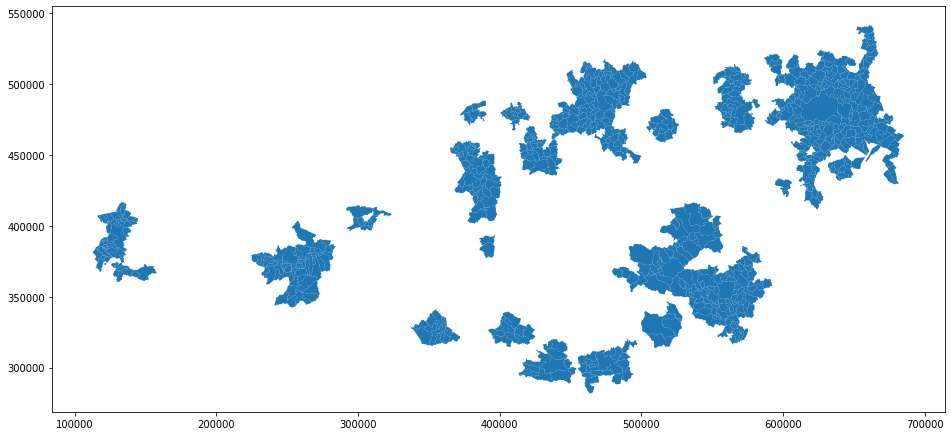

In [30]:
gdf2.plot()

#### See also:
[Geocoding](https://geopandas.org/docs/user_guide/geocoding.html)  
[Aggregations](https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html)  
[Spatial Joins](https://geopandas.org/docs/user_guide/mergingdata.html)  
[Gallery](https://geopandas.org/gallery/index.html)  

## Using [Folium](http://python-visualization.github.io/folium/)

In [31]:
import folium
from folium import Choropleth, Circle, Marker, GeoJson
from folium.plugins import HeatMap, MarkerCluster

In [32]:
m = folium.Map(location=[48.2, 16.3])
m

Saving into an HTML file

In [33]:
# m.save("index.html")

In [34]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

tooltip = "Click me!"

folium.Marker([45.3288, -121.6625], popup="<i>Mt. Hood Meadows</i>", tooltip=tooltip).add_to(m)
folium.Marker([45.3311, -121.7113], popup="<b>Timberline Lodge</b>", tooltip=tooltip).add_to(m)

m

#### There is built in support for colors and marker icon types from bootstrap.

In [35]:
m = folium.Map(location=[45.372, -121.6972], zoom_start=12, tiles="Stamen Terrain")

folium.Marker(location=[45.3288, -121.6625], popup="Mt. Hood Meadows", icon=folium.Icon(icon="cloud"),).add_to(m)
folium.Marker(location=[45.3311, -121.7113], popup="Timberline Lodge", icon=folium.Icon(color="green"),).add_to(m)
folium.Marker(location=[45.3300, -121.6823], popup="Some Other Location", icon=folium.Icon(color="red", icon="info-sign"),).add_to(m)

m

#### GeoJSON/TopoJSON Overlays  

Both GeoJSON and TopoJSON layers can be passed to the map as an overlay, and multiple layers can be visualized on the same map:

In [36]:
url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data")

antarctic_ice_edge = f"{url}/antarctic_ice_edge.json"
antarctic_ice_shelf_topo = f"{url}/antarctic_ice_shelf_topo.json"


m = folium.Map(location=[-59.1759, -11.6016], tiles="cartodbpositron", zoom_start=4,)
folium.GeoJson(antarctic_ice_edge, name="geojson").add_to(m)
folium.TopoJson(json.loads(requests.get(antarctic_ice_shelf_topo).text), "objects.antarctic_ice_shelf", name="topojson",).add_to(m)
folium.LayerControl().add_to(m)

m

## Using [Plotly](https://plotly.com/)

[Running with Jupyter Lab](https://plotly.com/python/getting-started/#jupyterlab-support-python-35)  
[Blog post](https://towardsdatascience.com/make-beautiful-spatial-visualizations-with-plotly-and-mapbox-fd5a638d6b3c)

In [37]:
#import plotly as py

from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio

pio.renderers.default = 'iframe' # or 'notebook' or 'colab'
#init_notebook_mode()

#### [Maps Configuration](https://plotly.com/python/map-configuration/)

In [38]:
fig = go.Figure(go.Scattergeo())
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [39]:
fig = go.Figure(go.Scattergeo())
fig.update_geos(
    visible=True,
    resolution=50,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
    showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
    showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue"
)

fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [40]:
fig = go.Figure(go.Scattergeo())
fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [41]:
fig = go.Figure(go.Scattergeo())
fig.update_geos(projection_type="natural earth")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Choropleth map using GeoJSON

In [42]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [43]:
counties.keys()

dict_keys(['type', 'features'])

In [44]:
counties['features'][0]

{'type': 'Feature',
 'properties': {'GEO_ID': '0500000US01001',
  'STATE': '01',
  'COUNTY': '001',
  'NAME': 'Autauga',
  'LSAD': 'County',
  'CENSUSAREA': 594.436},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-86.496774, 32.344437],
    [-86.717897, 32.402814],
    [-86.814912, 32.340803],
    [-86.890581, 32.502974],
    [-86.917595, 32.664169],
    [-86.71339, 32.661732],
    [-86.714219, 32.705694],
    [-86.413116, 32.707386],
    [-86.411172, 32.409937],
    [-86.496774, 32.344437]]]},
 'id': '01001'}

In [45]:
df1 = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv", dtype={"fips": str})
df1.head()

,fips,unemp
0,01001,5.3
1,01003,5.4
2,01005,8.6
3,01007,6.6
4,01009,5.5


In [46]:
fig = px.choropleth(df1,
                    geojson=counties, 
                    locations='fips', 
                    color='unemp',
                    color_continuous_scale="Viridis",
                    range_color=(0, 12),
                    scope="usa",
                    labels={'unemp':'unemployment rate'}
                   )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [47]:
data = dict(type = 'choropleth',
            locations = ['Germany','Switzerland','Czechia','Italy','Slovakia','Slovenia','Hungary', 'Liechtenstein', 'Greece'],
            locationmode = 'country names',
            colorscale= 'Portland',
            text= ['DE','CH','CZ','IT','SK','SI','HU','LI','GR'],
            z=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0],
            colorbar = {'title':'Country Colours', 'len':200,'lenmode':'pixels' })

fig = go.Figure(data = [data])

fig.update_geos(projection_type="orthographic")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#iplot(fig)

#### Using data on [World Hapiness](https://www.kaggle.com/unsdsn/world-happiness#2017.csv)

In [48]:
df3 = pd.read_csv('../Data/CSV/happiness2017.csv')
df3.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [50]:
#Create an account token at: https://account.mapbox.com/
mapbox_access_token = open('./mapbox_token.txt').read()

In [53]:
layout = go.Layout(title='Happiness',
                   autosize=True,
                   hovermode='closest',
                   showlegend=False,
                   mapbox=dict(accesstoken=mapbox_access_token,
                               bearing=0,
                               center=dict(lat=38,
                                           lon=-94),
                               pitch=0,
                               zoom=3,
                               style='light'),)

In [54]:
data = dict(type = 'choropleth',
            locations = df3['Country'],
            locationmode='country names',
            #colorscale = ['Viridis'],
            z=df3['Happiness.Score'])

fig = go.Figure(data=data, layout=layout)

#fig.update_geos(projection_type="orthographic")
#fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#iplot(fig)

### Case study: Using Nominatim for plotting UFO Data

http://wiki.openstreetmap.org/wiki/Nominatim_usage_policy  
https://github.com/twain47/Nominatim/blob/master/docs/Installation.md

In [55]:
from nominatim import Nominatim

In [56]:
base_url = "http://www.nuforc.org/webreports/"
index_url = "http://www.nuforc.org/webreports/ndxevent.html"

In [57]:
def can_cast_as_dt(dateStr, fmt):
    try:
        datetime.strptime(dateStr, fmt)
        return True
    except ValueError:
        return False

def parse_dt(dateStr):
    # the data in the website comes in two different formats, try both 
    for fmt in ["%m/%d/%y %H:%M", "%m/%d/%y"]:
        try:
            return datetime.strptime(dateStr, fmt)
        except ValueError:
            continue

def get_data_from_url(url):
    print("Processing {}".format(url))
    data = []
    source = BeautifulSoup(urllib.request.urlopen(url), "html5lib")
    for row in source('tr'):
        if not row('td'):
            continue # header row
        row_data = row('td')
        # parse the datetime from the string
        date_time = parse_dt(row_data[0].text)
        city = row_data[1].text
        state = row_data[2].text
        shape = row_data[3].text
        duration = row_data[4].text
        data.append((date_time, city, state, shape, duration))
    return data

In [110]:
# get the index page
raw_page = requests.get(index_url)
source = BeautifulSoup(raw_page.text,'html5')

# get all the links in the index page
func1 = lambda x: (x.text, base_url + x['href'])
monthly_urls = list(map(func1,source('a')))
# get  the last 12 links that have a text like mm/yyyy
func2 = lambda x: can_cast_as_dt(x[0], "%m/%Y")
last_year_urls = filter(func2, monthly_urls[0:13]) 
# extract the data from each monthly page and flatten the lists of tuples
last_year_ufos = list(chain(*map(lambda x: get_data_from_url(x[1]), last_year_urls)))
# initialize a pandas DataFrame with the list of tuples

Processing http://www.nuforc.org/webreports/ndxe202105.html
Processing http://www.nuforc.org/webreports/ndxe202104.html
Processing http://www.nuforc.org/webreports/ndxe202103.html
Processing http://www.nuforc.org/webreports/ndxe202102.html
Processing http://www.nuforc.org/webreports/ndxe202101.html
Processing http://www.nuforc.org/webreports/ndxe202012.html
Processing http://www.nuforc.org/webreports/ndxe202011.html
Processing http://www.nuforc.org/webreports/ndxe202010.html
Processing http://www.nuforc.org/webreports/ndxe202009.html
Processing http://www.nuforc.org/webreports/ndxe202008.html
Processing http://www.nuforc.org/webreports/ndxe202007.html
Processing http://www.nuforc.org/webreports/ndxe202006.html


In [111]:
ufos_df = pd.DataFrame(last_year_ufos, columns=["start","city","state","shape","duration_description"])

In [112]:
ufos_df.head()

,start,city,state,shape,duration_description
0,2021-05-19 20:15:00,Atlanta,GA,Sphere,10 min
1,2021-05-19 17:25:00,Glens Falls,NY,Triangle,20 minutes
2,2021-05-19 14:30:00,North Haledon,NJ,Other,20 mins
3,2021-05-19 10:50:00,Clarksburg,MD,Triangle,1 min
4,2021-05-19 01:00:00,Sharon Connecticut,CT,Light,1 hour


In [113]:
ufos_df.replace(to_replace='', value=np.nan, inplace=True, limit=None, regex=False, method='pad')
ufos_df = ufos_df.dropna() 

In [114]:
ufos_df.head()

,start,city,state,shape,duration_description
0,2021-05-19 20:15:00,Atlanta,GA,Sphere,10 min
1,2021-05-19 17:25:00,Glens Falls,NY,Triangle,20 minutes
2,2021-05-19 14:30:00,North Haledon,NJ,Other,20 mins
3,2021-05-19 10:50:00,Clarksburg,MD,Triangle,1 min
4,2021-05-19 01:00:00,Sharon Connecticut,CT,Light,1 hour


#### Engineering time

In [115]:
# function that infers the duration from the text 
def infer_duration_in_seconds(text):
    # try different regexps to extract the total seconds
    text = text.replace('<','')
    text = text.replace('>','')
    text = text.replace('?','')
    text = text.replace('+','')
    text = text.replace('~','')
    metric_text = ["second","s","Second","segundo","minute","m","min","Minute","hour","h","Hour",'Currently']
    metric_seconds = [1,1,1,1,60,60,60,3600,3600,3600,10]
    for metric,mult in zip(metric_text, metric_seconds):
        regex = "\s*(\d+)\+?\s*{}s?".format(metric)
        res = re.findall(regex,text)
        if len(res)>0:
            return int(float(res[0]) * mult)
    return 0

In [116]:
# extract the duration in seconds
ufos_df["duration_secs"] = ufos_df["duration_description"].apply(infer_duration_in_seconds)

# now we can infer the end time of the UFO sighting as well
# which will be useful for the animation later
ufos_df["end"] = ufos_df.apply(lambda x:x["start"] + timedelta(seconds=x["duration_secs"]),axis=1)
ufos_df = ufos_df.dropna()

In [117]:
ufos_df.head()

,start,city,state,shape,duration_description,duration_secs,end
0,2021-05-19 20:15:00,Atlanta,GA,Sphere,10 min,600,2021-05-19 20:25:00
1,2021-05-19 17:25:00,Glens Falls,NY,Triangle,20 minutes,1200,2021-05-19 17:45:00
2,2021-05-19 14:30:00,North Haledon,NJ,Other,20 mins,1200,2021-05-19 14:50:00
3,2021-05-19 10:50:00,Clarksburg,MD,Triangle,1 min,60,2021-05-19 10:51:00
4,2021-05-19 01:00:00,Sharon Connecticut,CT,Light,1 hour,3600,2021-05-19 02:00:00


#### Finding Locations

In [118]:
geolocator = Nominatim()
geolocator.query('Newport News')
#geolocator.query("Houston, TX")

[{'place_id': 469421,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'node',
  'osm_id': 158616376,
  'boundingbox': ['36.8175016', '37.1375016', '-76.58977', '-76.26977'],
  'lat': '36.9775016',
  'lon': '-76.42977',
  'display_name': 'Newport News, Virginia, 23607, United States',
  'class': 'place',
  'type': 'city',
  'importance': 0.686660556787456,
  'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_place_city.p.20.png'},
 {'place_id': 258088659,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'relation',
  'osm_id': 3864704,
  'boundingbox': ['36.930691', '37.2206658', '-76.646093', '-76.36161'],
  'lat': '37.0914429',
  'lon': '-76.5213892',
  'display_name': 'Newport News, Virginia, United States',
  'class': 'boundary',
  'type': 'administrative',
  'importance': 0.686660556787456,
  'icon': 'https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_admin

In [119]:
#Be careful with too many queries made to the server in a short period of time

ufos_df["lat"] = 0
ufos_df["lon"] = 0
for i in range(len(ufos_df[0:10])):
    try:
        resp_json = geolocator.query(ufos_df['city'][i])
        ufos_df.loc[i, "lat"] = resp_json[0]['lat']
        ufos_df.loc[i, "lon"] = resp_json[0]['lon']
    except:
        ufos_df.loc[i, "lat"] = 0
        ufos_df.loc[i, "lat"] = 0
    time.sleep(1.5)

In [120]:
ufos_df.to_pickle(os.path.join('../Data/','ufos_df.pkl'))
ufos_df = pd.read_pickle(os.path.join('../Data','ufos_df.pkl'))
ufos_df.head(10)

,start,city,state,shape,duration_description,duration_secs,end,lat,lon
0,2021-05-19 20:15:00,Atlanta,GA,Sphere,10 min,600,2021-05-19 20:25:00,33.7489924,-84.3902644
1,2021-05-19 17:25:00,Glens Falls,NY,Triangle,20 minutes,1200,2021-05-19 17:45:00,43.309941,-73.644447
2,2021-05-19 14:30:00,North Haledon,NJ,Other,20 mins,1200,2021-05-19 14:50:00,40.9550981,-74.1859782
3,2021-05-19 10:50:00,Clarksburg,MD,Triangle,1 min,60,2021-05-19 10:51:00,39.2806451,-80.3445341
4,2021-05-19 01:00:00,Sharon Connecticut,CT,Light,1 hour,3600,2021-05-19 02:00:00,41.8792599,-73.4767897
5,2021-05-19 00:23:00,Rosamond,CA,Formation,1 minute,60,2021-05-19 00:24:00,34.871511,-118.21577475000001
6,2021-05-18 00:00:00,Corvallis,OR,Cigar,20 seconds,20,2021-05-18 00:00:20,44.5645659,-123.2620435
7,2021-05-18 21:25:00,Colton,CA,Circle,15 seconds,15,2021-05-18 21:25:15,34.0739016,-117.3136547
8,2021-05-18 12:00:00,Lewisburg,PA,Other,All night/every night,0,2021-05-18 12:00:00,37.8017879,-80.4456303
9,2021-05-18 11:30:00,Paso Robles,CA,Sphere,5-10 seconds,10,2021-05-18 11:30:10,35.6267654,-120.6912456


In [75]:
# Note: dropna will drop any columns with None values, which is desirable
ufos_df[["start","end","lon","lat","shape"]].dropna().to_csv(os.path.join('../Data/','ufo_data.csv'), index=False, encoding="utf-8")

In [76]:
gdf = gpd.GeoDataFrame(ufos_df, geometry=gpd.points_from_xy(ufos_df.lon, ufos_df.lat))
gdf.head()

,start,city,state,shape,duration_description,duration_secs,end,lat,lon,geometry
0,2021-05-19 20:15:00,Atlanta,GA,Sphere,10 min,600,2021-05-19 20:25:00,33.7489924,-84.3902644,POINT (-84.39026 33.74899)
1,2021-05-19 17:25:00,Glens Falls,NY,Triangle,20 minutes,1200,2021-05-19 17:45:00,43.309941,-73.644447,POINT (-73.64445 43.30994)
2,2021-05-19 14:30:00,North Haledon,NJ,Other,20 mins,1200,2021-05-19 14:50:00,40.9550981,-74.1859782,POINT (-74.18598 40.95510)
3,2021-05-19 10:50:00,Clarksburg,MD,Triangle,1 min,60,2021-05-19 10:51:00,39.2806451,-80.3445341,POINT (-80.34453 39.28065)
4,2021-05-19 01:00:00,Sharon Connecticut,CT,Light,1 hour,3600,2021-05-19 02:00:00,41.8792599,-73.4767897,POINT (-73.47679 41.87926)


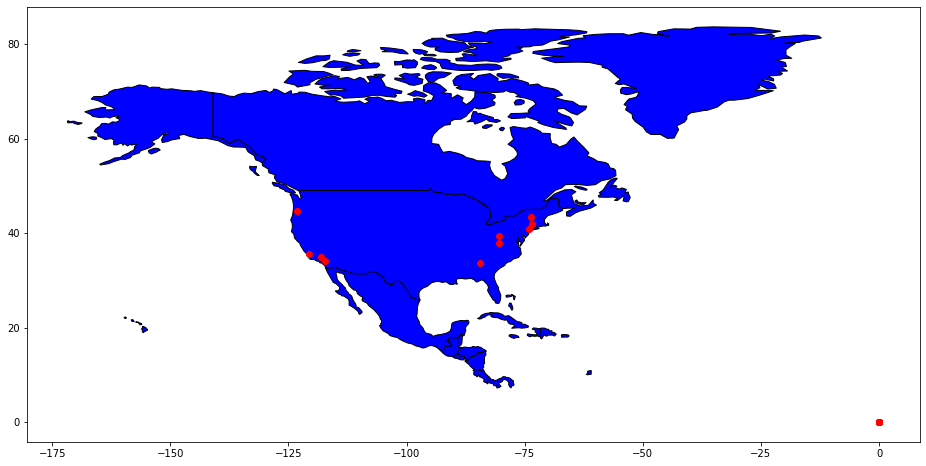

In [77]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to North America.
ax = world[world.continent == 'North America'].plot(color='blue', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')
plt.show()

### Case study: Spatial Analysis with Twitter

In [78]:
import twitter

In [79]:
with open('./twitter_tokens.txt', 'r') as twitter_tokens:
    tokens = twitter_tokens.read().split(',')
consumer_key = tokens[0].strip()
consumer_secret = tokens[1].strip()
access_token = tokens[2].strip()
access_token_secret = tokens[3].strip()

In [80]:
api = twitter.Api(consumer_key, consumer_secret, access_token, access_token_secret, sleep_on_rate_limit=True)

In [85]:
msgpublicas = api.GetStreamSample()
geo_points = 0
lats, lons = [], []
users = []
while geo_points < 3:
    tweet = next(msgpublicas)
    if 'coordinates' in tweet.keys() and tweet['coordinates'] != None:
        print(tweet['text'])
        coords = tweet['coordinates']['coordinates']
        user = tweet['user']['id']
        print(u'User {} in coordinates {}'.format(user, [coords[1],coords[0]]))
        lons.append(float(coords[0]))
        lats.append(float(coords[1]))
        users.append(user)
        geo_points +=1

Bom dia pra você também!!!
#luacheia 
#lualinda🌕 em Paulista https://t.co/sbBtir1Cx6
User 286154105 in coordinates [-7.94, -34.8804]
Just posted a photo @ Mothy and the Squid https://t.co/Z7COZ05Tf7
User 234491444 in coordinates [55.8269586, -4.471262]
Just posted a photo @ Uri Soča https://t.co/xe3wiIM1Mf
User 806739902 in coordinates [46.06766979, 14.52482329]


In [86]:
df_twitter = pd.DataFrame({'User':users, 'lat':lats, 'long':lons})
df_twitter.to_pickle(os.path.join('../Data/','df_twitter.pkl'))
df_twitter = pd.read_pickle(os.path.join('../Data','df_twitter.pkl'))
df_twitter.head()

,User,lat,long
0,286154105,-7.940000,-34.880400
1,234491444,55.826959,-4.471262
2,806739902,46.067670,14.524823


In [88]:
gdf_twitter = gpd.GeoDataFrame(df_twitter, geometry=gpd.points_from_xy(df_twitter.long, df_twitter.lat))
gdf_twitter.head()

,User,lat,long,geometry
0,286154105,-7.940000,-34.880400,POINT (-34.88040 -7.94000)
1,234491444,55.826959,-4.471262,POINT (-4.47126 55.82696)
2,806739902,46.067670,14.524823,POINT (14.52482 46.06767)


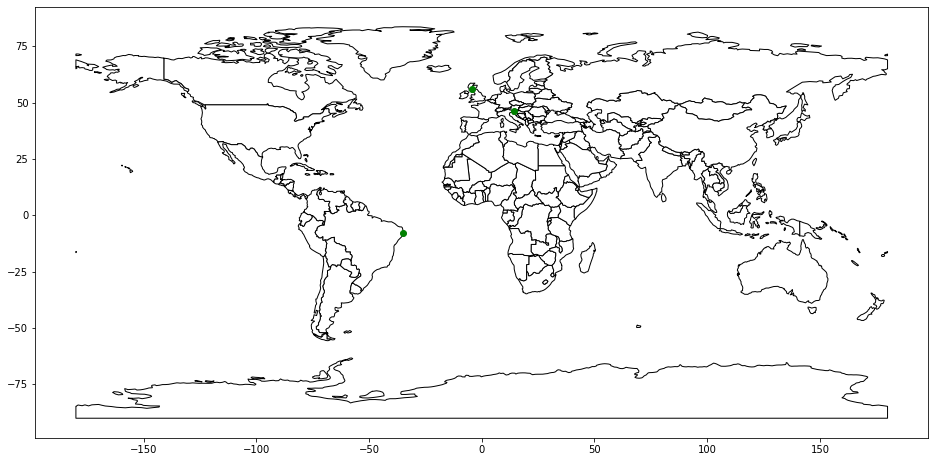

In [89]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
gdf_twitter.plot(ax=ax, color='green')
plt.show()